hackathon用のデータを作っていきます。<br>
潜在変数を予測に組み込むのと、そうではないので誤分類率に差が出るのかを検証します。

In [70]:
import numpy as np
import pandas as pd
import sklearn

鉄の動態と類似のデータを二種類作ります。<br>
ターゲットデータ：A 二値変数　<br>
特徴量<br>
観測変数:B,C,D,E連続変数 <br>
潜在変数:F ①二値変数 　②連続<br>
ターゲットデータはB,E,Fによって生成<br>
①潜在変数はC,D,E によって生成
②C,D,Eは潜在変数により生成

Data1

In [71]:
np.random.seed()
num_of_data = 500
"観測変数"
C = np.random.normal(1,1,num_of_data )#平均1　標準偏差１
D = np.random.normal(2,1,num_of_data )#平均２　標準偏差１
E = np.random.normal(0,1,num_of_data )#平均０　標準偏差１
B = [np.random.normal(C[i]*2 + 1,0.5,1)[0] for i in range(num_of_data)]#Cから重み[2,1]標準偏差０.25で生成（線形ガウス）

潜在変数FはC、D、Eの重みつき和をスレッシュホールドを設けて二値変数に変換。

In [72]:
"潜在変数"
w = {"C":[2,1],"D":[3,1],"E":[1,1]}#重み　keyは重み親ノードに対応　子ノードは常にF
weighted_sum_of_features = [w["C"][0]*C[i]+w["C"][1] + w["D"][0]*D[i] + w["D"][1] + w["E"][0]*E[i] + w["E"][1] for i in range(num_of_data )]
threshold_F = 14#threshold
F = [1 if(i>threshold_F) else 0 for i in weighted_sum_of_features]

ターゲット変数AはB,E,Fからルールベースで作成。

In [73]:
thresh_B = [2,5]#潜在変数によって閾値が変わる。0の時左1、の時右の値を採用。
thresh_E = 2
A = [1 if((F[i]==0 and B[i]<thresh_B[0] and E[i]<thresh_E)or(F[i]==1 and B[i]<thresh_B[1] and E[i]<thresh_E)) else 0 for i in range(num_of_data)]

In [74]:
data_1 = pd.DataFrame(np.array([A,B,C,D,E,F]).T,columns=["A","B","C","D","E","F"])

In [75]:
data_1.head()

,A,B,C,D,E,F
0,0.0,5.338404,1.778694,1.724279,-0.940118,0.0
1,0.0,6.615995,2.348645,-0.160767,-0.598767,0.0
2,0.0,3.947649,1.319063,1.184382,0.174877,0.0
3,1.0,1.810325,0.484590,-1.173037,-0.075372,0.0
4,0.0,3.699764,1.227015,2.833618,-0.791540,0.0


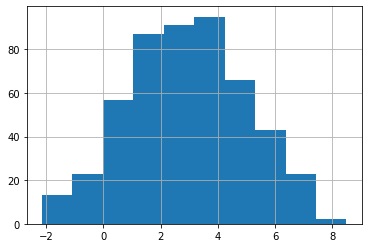

In [76]:
data_1["B"].hist()

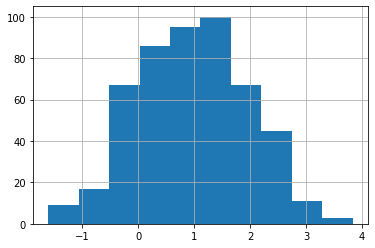

In [77]:
data_1["C"].hist()

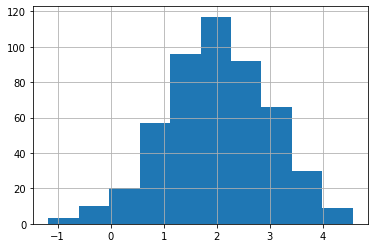

In [78]:
data_1["D"].hist()

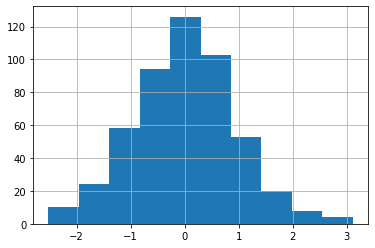

In [79]:
data_1["E"].hist()

Data2

In [81]:
np.random.seed()
"潜在変数F"
F = np.random.normal(0,1,num_of_data)#平均0標準偏差１

"潜在変数から観測変数を生成（線形ガウス）"
w = {"C":[1,3],"D":[3,1],"E":[2,1]}#重み　keyは子ノードに対応親ノードは常にF
C =  [np.random.normal(F[i]*w["C"][0] + w["C"][1],0.5,1)[0] for i in range(num_of_data)]#標準偏差0.5
D = [np.random.normal(F[i]*w["D"][0] + w["D"][1],0.5,1)[0] for i in range(num_of_data)]#標準偏差0.5
E = [np.random.normal(F[i]*w["E"][0] + w["E"][1],0.5,1)[0] for i in range(num_of_data)]#標準偏差0.5
"BはCから生成（線形ガウス）　本質的ではないので重みは変えない前提"
B = [np.random.normal(C[i]*2 + 1,0.5,1)[0] for i in range(num_of_data)]
